Projekt MNwS - Aleksander Folfas 411052

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Zadanie 16

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń hipotezy głównej w teście MannaWhitneya i w teście równości dwóch wartości oczekiwanych (funkcja t.test) w przypadku, gdy jedne
dane pochodzą z rozkładu normalnego, a drugie np. z rozkładu 𝜒
2
 (który nie jest rozkładem
symetrycznym). W trakcie symulowania danych należy pamiętać, by dane spełniały hipotezę główną
(najlepiej je zestandaryzować).
Uzyskane wyniki należy opisać zależności od:
- liczby danych,
- liczby stopni swobody generowanego rozkładu 𝜒
2
.

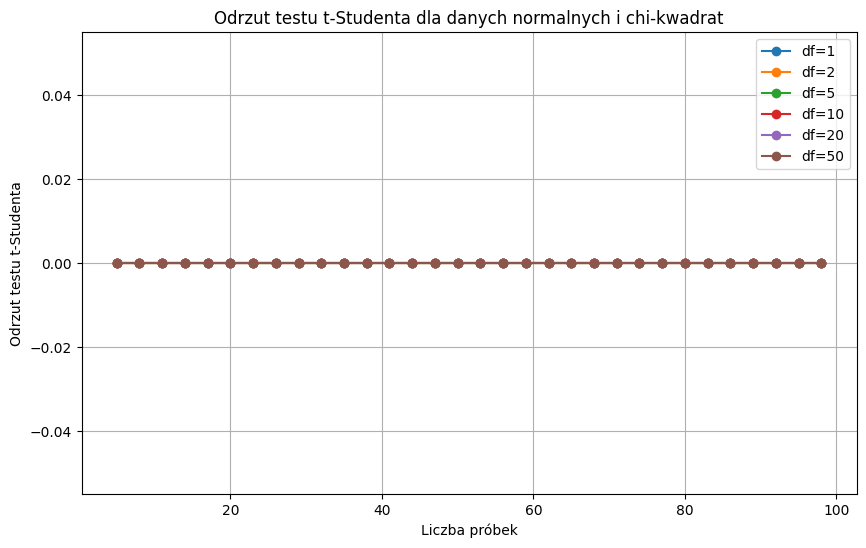

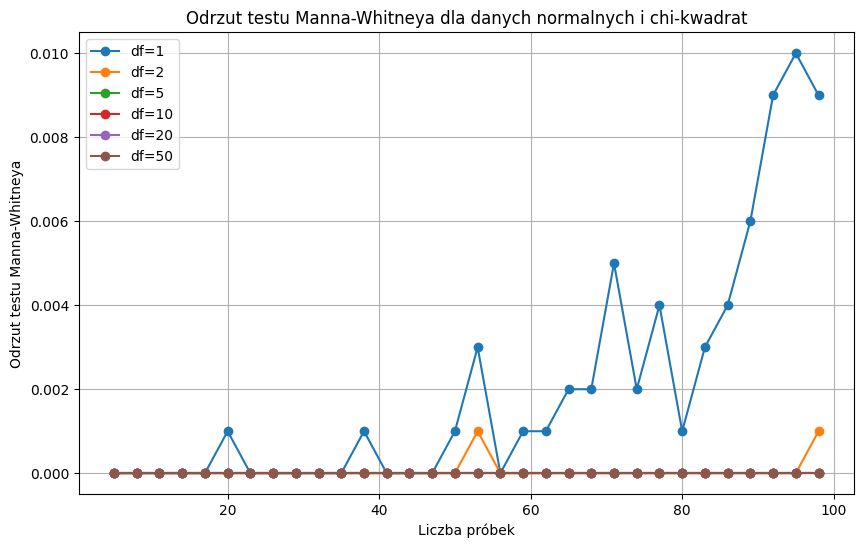

In [4]:
def rejection_rate_normal_chi2(n_samples, df, n_simulations=1000):
    t_rejections = 0
    mw_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych z rozkładu normalnego i rozkładu chi-kwadrat
        group1 = np.random.normal(loc=0, scale=1, size=n_samples)
        group2 = np.random.chisquare(df, size=n_samples)

        # Standaryzacja danych
        group1 = (group1 - np.mean(group1)) / np.std(group1)
        group2 = (group2 - np.mean(group2)) / np.std(group2)

        # Test t-Studenta (test równości średnich)
        t_stat, t_pvalue = stats.ttest_ind(group1, group2)
        if t_pvalue < 0.05:
            t_rejections += 1

        # Test Manna-Whitneya
        mw_stat, mw_pvalue = stats.mannwhitneyu(group1, group2)
        if mw_pvalue < 0.05:
            mw_rejections += 1

    t_rejection_rate = t_rejections / n_simulations
    mw_rejection_rate = mw_rejections / n_simulations

    return t_rejection_rate, mw_rejection_rate

# Parametry symulacji
n_samples_range = np.arange(5, 100, 3)
df_range = [1, 2, 5, 10, 20, 50]

t_rejection_rates = np.zeros((len(n_samples_range), len(df_range)))
mw_rejection_rates = np.zeros((len(n_samples_range), len(df_range)))

# Symulacje dla różnych wartości liczby danych i liczby stopni swobody rozkładu chi-kwadrat
for i, n_samples in enumerate(n_samples_range):
    for j, df in enumerate(df_range):
        t_rejection_rate, mw_rejection_rate = rejection_rate_normal_chi2(n_samples, df)
        t_rejection_rates[i, j] = t_rejection_rate
        mw_rejection_rates[i, j] = mw_rejection_rate

# Generowanie wykresu dla testu t-Studenta
plt.figure(figsize=(10, 6))
for j, df in enumerate(df_range):
    plt.plot(n_samples_range, t_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu t-Studenta')
plt.title('Odrzut testu t-Studenta dla danych normalnych i chi-kwadrat')
plt.legend()
plt.grid(True)
plt.show()

# Generowanie wykresu dla testu Manna-Whitneya
plt.figure(figsize=(10, 6))
for j, df in enumerate(df_range):
    plt.plot(n_samples_range, mw_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Manna-Whitneya')
plt.title('Odrzut testu Manna-Whitneya dla danych normalnych i chi-kwadrat')
plt.legend()
plt.grid(True)
plt.show()